<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/xor_dataset_pytorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
class XOR_Dataset(Dataset):
  def __init__(self, Number_of_sample):
    
    self.x = torch.zeros(Number_of_sample, 2)
    self.y = torch.zeros(Number_of_sample, 1)

    for i in range(Number_of_sample // 4):
      self.x[i, :] = torch.tensor([0.0, 0.0])
      self.y[i, 0] = torch.tensor([0.0])

      self.x[i + Number_of_sample // 4, :] = torch.tensor([0.0, 1.0])
      self.y[i + Number_of_sample // 4, 0] = torch.tensor([1.0])

      self.x[i + 2 * Number_of_sample // 4, :] = torch.tensor([1.0, 0.0])
      self.y[i + 2 * Number_of_sample // 4, 0] = torch.tensor([1.0])

      self.x[i + 3 * Number_of_sample // 4, :] = torch.tensor([1.0, 1.0])
      self.y[i + 3 * Number_of_sample // 4, 0] = torch.tensor([0.0])

    self.x = self.x +   torch.rand((Number_of_sample, 2), dtype=torch.float32)
    self.len = Number_of_sample

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

  def __len__(self):
    return self.len

In [43]:
xor_datas = XOR_Dataset(500)

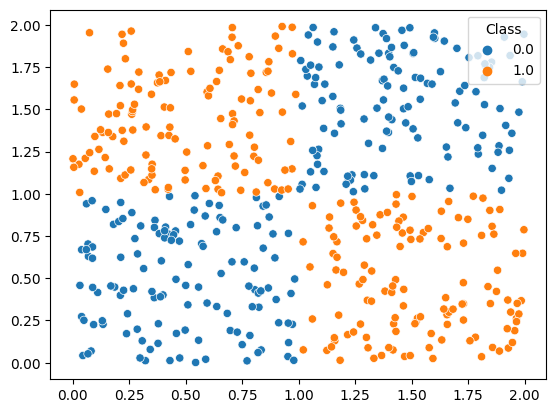

In [44]:
dataset = torch.concat((xor_datas.x, xor_datas.y), axis=1).numpy()
sns.scatterplot(data=dataset, x = dataset[:,0], y= dataset[:,1], hue=dataset[:,2], legend='auto')
plt.legend(loc='upper right', title='Class')

In [45]:
class NN(nn.Module):
  def __init__(self, dim_input, hidden_units, dim_out):
    super(NN, self).__init__()

    self.linear1 = nn.Linear(dim_input, hidden_units)

    self.linear2 = nn.Linear(hidden_units, dim_out)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

In [46]:
model = NN(2, 4, 1)

In [47]:
for name, param in model.state_dict().items():
  print(name, ' : ', param)

linear1.weight  :  tensor([[-0.1451, -0.4269],
        [-0.2213, -0.4850],
        [ 0.1113, -0.2892],
        [-0.5895,  0.0494]])
linear1.bias  :  tensor([-0.1267,  0.5163, -0.3076, -0.0534])
linear2.weight  :  tensor([[ 0.1015,  0.1118, -0.1338, -0.4858]])
linear2.bias  :  tensor([0.0840])


In [48]:
model(torch.tensor([0.0, 0.1]))

tensor([0.5340], grad_fn=<SigmoidBackward0>)

In [49]:
def accuracy(model, dataset):
  
  correct = 0
  yhat = model(dataset.x)
  yhat[yhat > 0.5] = 1
  yhat[yhat < 0.5] = 0

  correct = correct + (dataset.y == yhat).sum().item()
  acc = correct / dataset.len

  return acc

def train(dataset, model, criterion, optimizer, trainloader, epochs):
  ACC = []
  COST = []
  
  for epoch in range(n_epochs):
    total = 0
    for x, y in train_loader:

      yhat = model(x)
      loss = criterion(yhat, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total += loss.item()
    
    COST.append(total)
    ACC.append(accuracy(model, dataset))
  
  return COST, ACC

In [50]:
n_epochs = 2000

model = NN(2, 10, 1)

train_loader = DataLoader(dataset=xor_datas, batch_size=50)
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)
loss = nn.BCELoss()

cost, acc = train(xor_datas, model, loss, optimizer, train_loader, n_epochs)

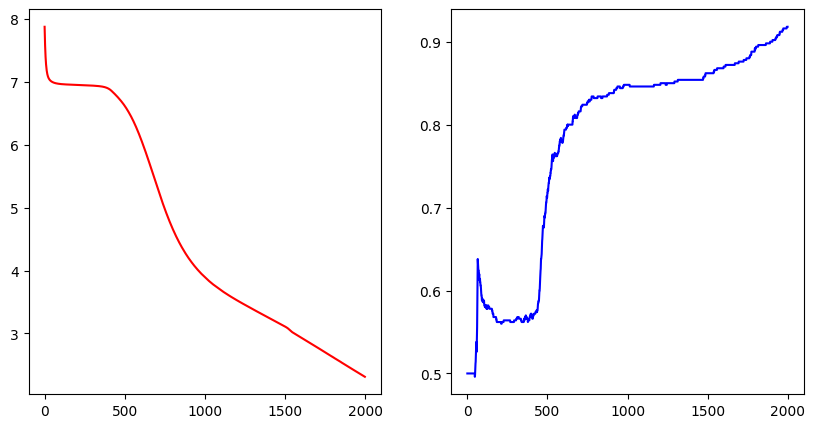

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([i for i in range(n_epochs)], cost, color="red")
plt.subplot(1,2,2)
plt.plot([i for i in range(n_epochs)], acc, color="blue")

In [52]:
import pandas as pd
test_data = XOR_Dataset(500)
df = pd.DataFrame(torch.concat((test_data.x, test_data.y), axis=1))

df1 = df[df[2] == 1]
df2 = df[df[2] == 0]

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


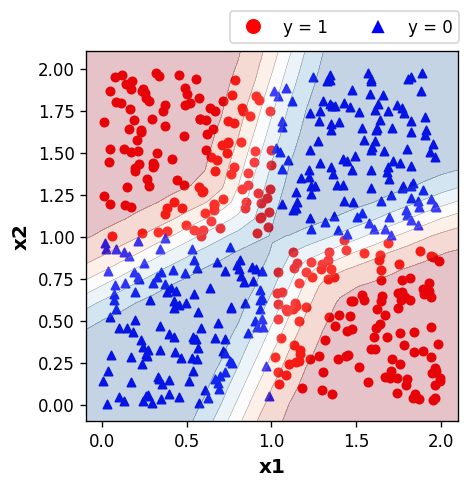

In [53]:
from matplotlib.lines import Line2D
def plot_decision_boundary(X, Y, cmap='RdBu_r'):

  h = 0.1
  x_min, x_max = X[0,:].min() - h, X[0,:].max() + h*2
  y_min, y_max = X[1,:].min() - h, X[1,:].max() + h*2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
  A2 = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
  A2 = A2.reshape(xx.shape)

  fig, ax = plt.subplots(figsize=(4,4), dpi=120)
  
  df1.plot.scatter(0 , 1 , s=25, c="red", cmap=cmap, ax=ax)
  df2.plot.scatter(0, 1, s=25, c="blue", cmap=cmap, ax=ax, marker="^")

  ax.contourf(xx, yy, A2.detach().numpy(), cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, A2.detach().numpy(), colors='k', linewidths=0.1)

  red_circle = Line2D([0], [0], marker='o', color='w', label='y = 1',markerfacecolor='r', markersize=10)
  blue_circle = Line2D([0], [0], marker='^', color='w', label='y = 0',markerfacecolor='b', markersize=10)
  ax.legend(handles=[red_circle,blue_circle], bbox_to_anchor=(1.025, 1.13), ncol=2)
  
  plt.xlabel("x1", fontsize=12, fontweight="bold")
  plt.ylabel("x2", fontsize=12, fontweight="bold")

plot_decision_boundary(X=test_data.x.numpy().T, Y=test_data.y.numpy())